In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data1/train_sentiment.csv


In [32]:
import numpy as np
import pandas as pd
import re
import string
import nltk
from sklearn.model_selection import train_test_split


In [33]:
import pandas as pd
df = pd.read_csv('/kaggle/input/train-data1/train_sentiment.csv', header=None)

df.head()

,0,1,2,3,4,5
0,4,2000548391,Mon Jun 01 22:22:01 PDT 2009,NO_QUERY,ticia42,"@Z12 She can't open the door by herself, so I ..."
1,0,2191932827,Tue Jun 16 06:13:30 PDT 2009,NO_QUERY,lhotfoot,@inournuclearage
2,4,1754199174,Sun May 10 05:23:02 PDT 2009,NO_QUERY,hockeycrew,@jesthebes At least your lawn hasn't been take...
3,0,1994056674,Mon Jun 01 11:20:41 PDT 2009,NO_QUERY,GeoBlack_Cat,"umm.. like, hello? where's the child support p..."
4,4,1980150068,Sun May 31 05:51:31 PDT 2009,NO_QUERY,rawrcelne,Joined twitter


In [34]:
df.shape

(1000000, 6)

In [35]:
df = df.set_axis(["target", "ids", "date", "flag", "user", "text"], axis="columns")
df.head()

,target,ids,date,flag,user,text
0,4,2000548391,Mon Jun 01 22:22:01 PDT 2009,NO_QUERY,ticia42,"@Z12 She can't open the door by herself, so I ..."
1,0,2191932827,Tue Jun 16 06:13:30 PDT 2009,NO_QUERY,lhotfoot,@inournuclearage
2,4,1754199174,Sun May 10 05:23:02 PDT 2009,NO_QUERY,hockeycrew,@jesthebes At least your lawn hasn't been take...
3,0,1994056674,Mon Jun 01 11:20:41 PDT 2009,NO_QUERY,GeoBlack_Cat,"umm.. like, hello? where's the child support p..."
4,4,1980150068,Sun May 31 05:51:31 PDT 2009,NO_QUERY,rawrcelne,Joined twitter


In [36]:
def fix_double_encoding(text):
    try:
        # Encode the incorrectly decoded string back to bytes using 'latin1'
        byte_text = text.encode('latin1')
        # Decode it correctly using 'utf-8' with error handling
        return byte_text.decode('utf-8', errors='replace')
    except UnicodeEncodeError:
        return text if text else 'EMPTY_TEXT'

# Apply the function to fix encoding
df['Fixed_Text'] = df['text'].apply(fix_double_encoding)

In [37]:
## Check garbled text in DF
def contains_non_ascii(text):
    try:
        text.encode('ascii')
    except UnicodeEncodeError as e:
        return True
    return False
# Apply the function to the DataFrame
df['ContainsGarbledText'] = df['Fixed_Text'].apply(contains_non_ascii)
df.drop(df[df['ContainsGarbledText'] == True].index, inplace=True)

In [38]:
df[df['ids'] == 2001157680]

,target,ids,date,flag,user,text,Fixed_Text,ContainsGarbledText


In [39]:
df.drop_duplicates(subset = 'text')

,target,ids,date,flag,user,text,Fixed_Text,ContainsGarbledText
0,4,2000548391,Mon Jun 01 22:22:01 PDT 2009,NO_QUERY,ticia42,"@Z12 She can't open the door by herself, so I ...","@Z12 She can't open the door by herself, so I ...",False
1,0,2191932827,Tue Jun 16 06:13:30 PDT 2009,NO_QUERY,lhotfoot,@inournuclearage,@inournuclearage,False
2,4,1754199174,Sun May 10 05:23:02 PDT 2009,NO_QUERY,hockeycrew,@jesthebes At least your lawn hasn't been take...,@jesthebes At least your lawn hasn't been take...,False
3,0,1994056674,Mon Jun 01 11:20:41 PDT 2009,NO_QUERY,GeoBlack_Cat,"umm.. like, hello? where's the child support p...","umm.. like, hello? where's the child support p...",False
4,4,1980150068,Sun May 31 05:51:31 PDT 2009,NO_QUERY,rawrcelne,Joined twitter,Joined twitter,False
...,...,...,...,...,...,...,...,...
999995,0,1985361990,Sun May 31 16:57:39 PDT 2009,NO_QUERY,lutheasalom,this song's middle change just doesn't want to...,this song's middle change just doesn't want to...,False
999996,4,2057029784,Sat Jun 06 12:14:24 PDT 2009,NO_QUERY,beeluz,@officialnjonas Good luck with that,@officialnjonas Good luck with that,False
999997,0,1835639354,Mon May 18 06:26:21 PDT 2009,NO_QUERY,lordmuttley,@ProudGamerTweet I rather average 32370,@ProudGamerTweet I rather average 32370,False
999998,0,2246780174,Fri Jun 19 18:06:46 PDT 2009,NO_QUERY,MizSadittyFancy,Pickin up @misstinayao waitin on @sadittysash ...,Pickin up @misstinayao waitin on @sadittysash ...,False


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 990899 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   target               990899 non-null  int64 
 1   ids                  990899 non-null  int64 
 2   date                 990899 non-null  object
 3   flag                 990899 non-null  object
 4   user                 990899 non-null  object
 5   text                 990899 non-null  object
 6   Fixed_Text           990899 non-null  object
 7   ContainsGarbledText  990899 non-null  bool  
dtypes: bool(1), int64(2), object(5)
memory usage: 61.4+ MB


In [41]:
df.dtypes

target                  int64
ids                     int64
date                   object
flag                   object
user                   object
text                   object
Fixed_Text             object
ContainsGarbledText      bool
dtype: object

In [42]:
import numpy as np
np.sum(df.isnull().any(axis=1))

0

In [43]:
df['target'].unique()

array([4, 0])

In [44]:
df['target'].value_counts(dropna = False)

target
0    496814
4    494085
Name: count, dtype: int64

In [45]:
df = df.drop(['date', 'flag', 'ids', 'user'], axis = 1)
df.head()

,target,text,Fixed_Text,ContainsGarbledText
0,4,"@Z12 She can't open the door by herself, so I ...","@Z12 She can't open the door by herself, so I ...",False
1,0,@inournuclearage,@inournuclearage,False
2,4,@jesthebes At least your lawn hasn't been take...,@jesthebes At least your lawn hasn't been take...,False
3,0,"umm.. like, hello? where's the child support p...","umm.. like, hello? where's the child support p...",False
4,4,Joined twitter,Joined twitter,False


In [46]:
# df=df[:2000]
df= df.drop(['text', "ContainsGarbledText"], axis = 1)
df

,target,Fixed_Text
0,4,"@Z12 She can't open the door by herself, so I ..."
1,0,@inournuclearage
2,4,@jesthebes At least your lawn hasn't been take...
3,0,"umm.. like, hello? where's the child support p..."
4,4,Joined twitter
...,...,...
999995,0,this song's middle change just doesn't want to...
999996,4,@officialnjonas Good luck with that
999997,0,@ProudGamerTweet I rather average 32370
999998,0,Pickin up @misstinayao waitin on @sadittysash ...


In [47]:
lst = df['Fixed_Text']
len(lst[1]), lst[1]

(17, '@inournuclearage ')

In [48]:
train, eval = train_test_split(df, test_size=0.2, random_state=42, stratify=df['target'])
print(f"new dataframe shapes: train is {train.shape}, eval is {eval.shape}")

new dataframe shapes: train is (792719, 2), eval is (198180, 2)


In [49]:
train.to_csv("train_subset.csv", index=False)
eval.to_csv("eval_subset.csv", index=False)

In [50]:
!pip install datasets

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [51]:
from datasets import load_dataset
dataset = load_dataset('csv',
                        data_files={'train': 'train_subset.csv',
                        'eval': 'eval_subset.csv'}, encoding = "utf-8")

Generating train split: 0 examples [00:00, ? examples/s]

Generating eval split: 0 examples [00:00, ? examples/s]

In [52]:
def transform_labels(target):
 target = target['target']
 num = 0
 if target == 0: #'Negative'
   num = 0
 elif target == 4: #'Positive'
   num = 1
 return {'targets': num}

dataset = dataset.map(transform_labels, remove_columns='target')

Map:   0%|          | 0/792719 [00:00<?, ? examples/s]

Map:   0%|          | 0/198180 [00:00<?, ? examples/s]

In [53]:
dataset

DatasetDict({
    train: Dataset({
        features: ['Fixed_Text', 'targets'],
        num_rows: 792719
    })
    eval: Dataset({
        features: ['Fixed_Text', 'targets'],
        num_rows: 198180
    })
})

In [54]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples['Fixed_Text'])
tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.map(lambda x: {'labels': x['targets']}, remove_columns=['targets'])

Map:   0%|          | 0/792719 [00:00<?, ? examples/s]

Map:   0%|          | 0/198180 [00:00<?, ? examples/s]

Map:   0%|          | 0/792719 [00:00<?, ? examples/s]

Map:   0%|          | 0/198180 [00:00<?, ? examples/s]

In [55]:
l = list(tokenized_dataset['train']['input_ids'])
len_list = []
for i in range(len(l)):
 
 len_list.append(len(l[i]))
# max = max(len_list)
# max


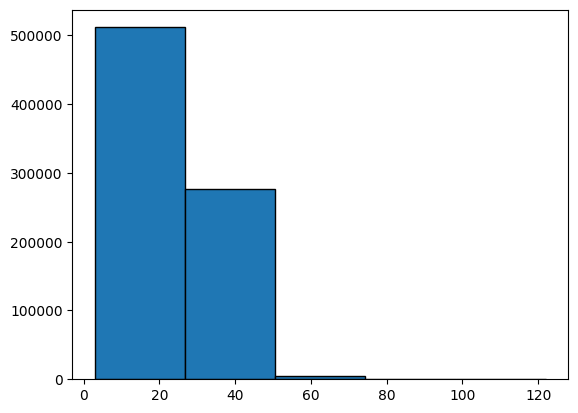

In [56]:
import matplotlib.pyplot as plt
plt.hist(len_list, bins=5, edgecolor='black')
plt.show()

In [57]:
from transformers import AutoTokenizer

# Initialize the tokenizer
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
def tokenize_function(examples):
    return tokenizer(examples['Fixed_Text'], padding='max_length', truncation=True, max_length=80)

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.map(lambda x: {'labels': x['targets']}, remove_columns=['targets'])

Map:   0%|          | 0/792719 [00:00<?, ? examples/s]

Map:   0%|          | 0/198180 [00:00<?, ? examples/s]

Map:   0%|          | 0/792719 [00:00<?, ? examples/s]

Map:   0%|          | 0/198180 [00:00<?, ? examples/s]

In [58]:
print(tokenized_dataset)

# Optionally, check the first example to see the tokenization
print(tokenized_dataset['train'][0])

DatasetDict({
    train: Dataset({
        features: ['Fixed_Text', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 792719
    })
    eval: Dataset({
        features: ['Fixed_Text', 'input_ids', 'attention_mask', 'labels'],
        num_rows: 198180
    })
})
{'Fixed_Text': "think of it as an adventure!  Of course, now I'm awake and had coffee, I've got a different perspective on things. ", 'input_ids': [101, 2228, 1997, 2009, 2004, 2019, 6172, 999, 1997, 2607, 1010, 2085, 1045, 1005, 1049, 8300, 1998, 2018, 4157, 1010, 1045, 1005, 2310, 2288, 1037, 2367, 7339, 2006, 2477, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [59]:
 from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
tokenizer = DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')

2024-07-23 16:12:34.224638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-23 16:12:34.224733: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-23 16:12:34.352882: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [60]:
model = DistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased', num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [61]:
!pip install accelerate>=0.21.0

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [62]:
pip install transformers torch

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Note: you may need to restart the kernel to use updated packages.


In [63]:
import torch
import transformers
import accelerate

print("Torch version:", torch.__version__)
print("Transformers version:", transformers.__version__)
print("Accelerate version:", accelerate.__version__)
print("CUDA available:", torch.cuda.is_available())

# Check if Accelerate library is correctly installed and imported
try:
    from accelerate import Accelerator
    print("Accelerate imported successfully")
except ImportError as e:
    print("Error importing Accelerate:", e)

Torch version: 2.1.2
Transformers version: 4.42.3
Accelerate version: 0.32.1
CUDA available: True
Accelerate imported successfully


In [64]:
!pip install transformers[torch] accelerate -U

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 315.1/315.1 kB 8.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 75.5 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: accelerate
    Found existing installation: accelerate 0.32.1
    Uninstalling accelerate-0.32.1:
      Successfully uninstalled accelerate-0.32.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.42.3
    Uninstalling transformers-4.42.3:
      Successfully uninstalled transformers-4.42.3


In [65]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [66]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=64,
    gradient_accumulation_steps=32,
    logging_steps=1,
    num_train_epochs=4,
    weight_decay=0.01,
    save_total_limit=2,
)


/opt/conda/lib/python3.10/site-packages/transformers/training_args.py:1494: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  metadata={
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


In [67]:
from datasets import load_metric
# Define a compute_metrics function to evaluate the model
def compute_metrics(p):
    metric = load_metric("accuracy")
    logits, labels = p
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['eval'],
    compute_metrics=compute_metrics
)

In [68]:
# Train the model
trainer.train()


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


Epoch,Training Loss,Validation Loss,Accuracy
0,0.322800,0.345266,0.849011
1,0.341900,0.333099,0.855011
2,0.320200,0.329839,0.857236
3,0.320500,0.328948,0.858205


/tmp/ipykernel_34/1529056036.py:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


The repository for accuracy contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/accuracy.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N]  y


/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '
/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead u

TrainOutput(global_step=1548, training_loss=0.3427291129179087, metrics={'train_runtime': 13293.7824, 'train_samples_per_second': 238.523, 'train_steps_per_second': 0.116, 'total_flos': 6.561600798767328e+16, 'train_loss': 0.3427291129179087, 'epoch': 3.9990312424315815})

In [69]:
results = trainer.evaluate()
print(results)

/opt/conda/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:68: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn('Was asked to gather along dimension 0, but all '


{'eval_loss': 0.32894787192344666, 'eval_accuracy': 0.8582046624280957, 'eval_runtime': 264.7017, 'eval_samples_per_second': 748.692, 'eval_steps_per_second': 5.852, 'epoch': 3.9990312424315815}
